# Homework 2: K-Nearest Neighbors

Make sure you have these libraries installed. Run the cell below to check and install them if needed.

In [384]:
# Check and install required libraries
!pip install numpy matplotlib scikit-learn --quiet

In [385]:
# Basic imports used in several parts (you will need more imports later)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap


# Initial dataset for parts 1 and 2
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=6, cluster_std=2)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Part 1: K-Nearest Neighbors in Numpy

In [386]:
# Follow the HW instructions to make your own classifier in Numpy, evaluate its accuracy, and plot your results

# This function executes the core logic of KNN. Namely, it finds the k nearest
# neighbors to point, and then finds and returns the most common label among those k.
# Write a function that takes in a point, some data, and a parameter k,
# and returns the k closest points to the input
def predict_y(point, x_data, y_data, k):
  # Implement this function, using the tips below.
  # There are many acceptable ways of doing this, but a straightforward one
  # is using a sequence of optimization loops. This will be inefficient, but plenty
  # fast for our small datasets.

  labels = []

  # TODO: First, make copies of your input data so you don't modify them.
  xc = x_data.copy()
  yc = y_data.copy()
  # TODO: Next, find the closest value in x_data to point, and add its label (in y_data) to
  # the list labels. Then, remove these points from x_data and y_data.

  # TODO: Repeat the above k times (using a loop)
  for i in range(k):
      distance = np.linalg.norm(xc - point, axis=1)
      cv = np.argmin(np.abs(distance))
      labels.append(yc[cv])
      xc = np.delete(xc,cv,axis=0)
      yc = np.delete(yc,cv)
  # TODO: Return the majority element in labels.
  labels = np.array(labels)
  values, counts = np.unique(labels, return_counts=True)
  majority_label = values[np.argmax(counts)]

  return majority_label

In [387]:
# TODO: Using your function above, predict the labels of all points in the testing data.
predictions = []
for i in range(len(y_test)):
    pred = predict_y(X_test[i], X_train, y_train, 10)
    predictions.append(pred)
predictions = np.array(predictions)
# TODO: Evaluate and print the accuracy of your classifier using the testing data (you will need to recall the definition of accuracy)
# (if your accuracy is below 0.9, you have probably made some sort of mistake)
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.91


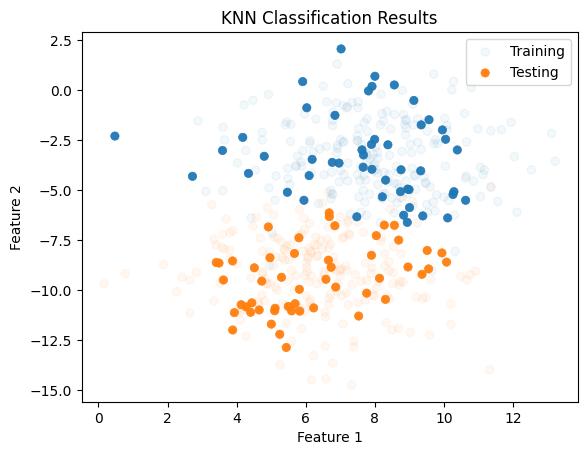

In [388]:
# TODO: Create a scatter plot to visualize your results. Make sure to follow the instructions in the assignment
# document, namely you should use point color to represent their predicted labels, and also alpha
# values to distinguish between training and test points.cmap_points = ListedColormap(["tab:blue", "tab:orange"])
# Define colormap for 2 classes

cmap_points = ListedColormap(["tab:blue", "tab:orange"])
# Training data
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap_points, alpha=0.05, label="Training")

# Testing data
plt.scatter(X_test[:,0], X_test[:,1], c=predictions, cmap=cmap_points, alpha=0.95, linewidths=0.5, label="Testing")

plt.title("KNN Classification Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Part 2: K-Nearest Neighbors in Sklearn

---



In [389]:
# Do the same analysis as part 1, but using KNeighborsClassifier from sklearn.neighbors
# Step 1. Build KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [390]:
# Step 2. Calculate the Accuracy (>0.9)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.91


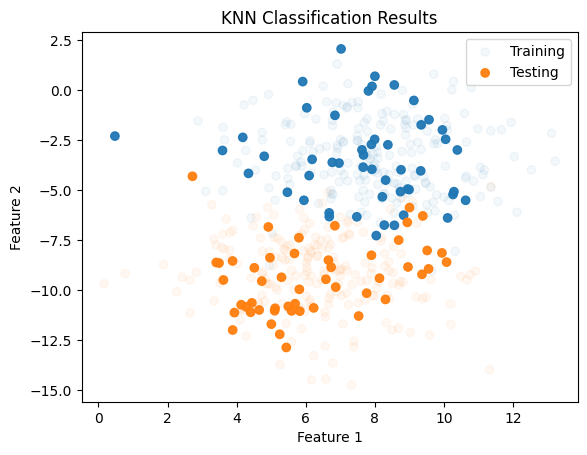

In [391]:
# Step 3. Plot
cmap_points = ListedColormap(["tab:blue", "tab:orange"])
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap_points, alpha=0.05, label="Training")
plt.scatter(X_test[:,0], X_test[:,1], c =y_test, cmap=cmap_points, alpha=0.95, label="Testing")
plt.title("KNN Classification Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Part 3: Beyond a simple case
---

In real life, things are typically more complicated than the example we’ve been practicing with. For example, data can be messier, and you have to make several decisions about details of your algorithm. In this part, we will see several examples of this.




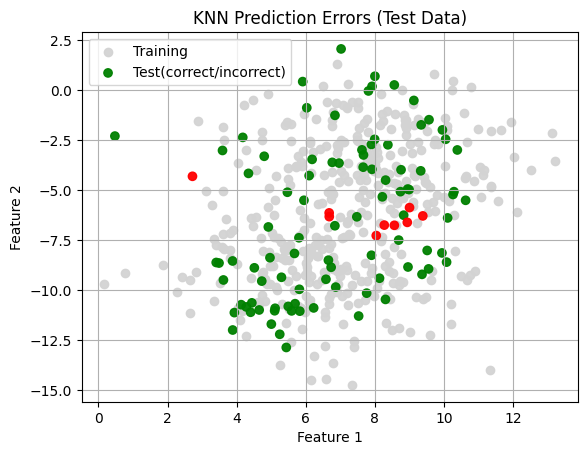

In [392]:
# In Parts 1 and 2, your final scatter plot displays the predicted labels for each test point.
# However, we cannot tell which predictions are correct and which are incorrect.
# Make another scatter plot displaying the prediction errors.
# That is, the color of each test point should depend on whether the prediction was correct or incorrect
# (make sure to also show the training points, as before).
# TODO: Plot the figure
correctness = (predictions == y_test)
cmap_correct = ListedColormap(["red", "green"])

plt.scatter(X_train[:,0], X_train[:,1], c= "lightgray", alpha=0.95, label= "Training")

plt.scatter(X_test[:,0], X_test[:,1], c = correctness, cmap = cmap_correct, alpha=0.95, label= "Test(correct/incorrect)")
plt.title("KNN Prediction Errors (Test Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

k=1: accuracy = 0.880
k=3: accuracy = 0.900
k=5: accuracy = 0.890


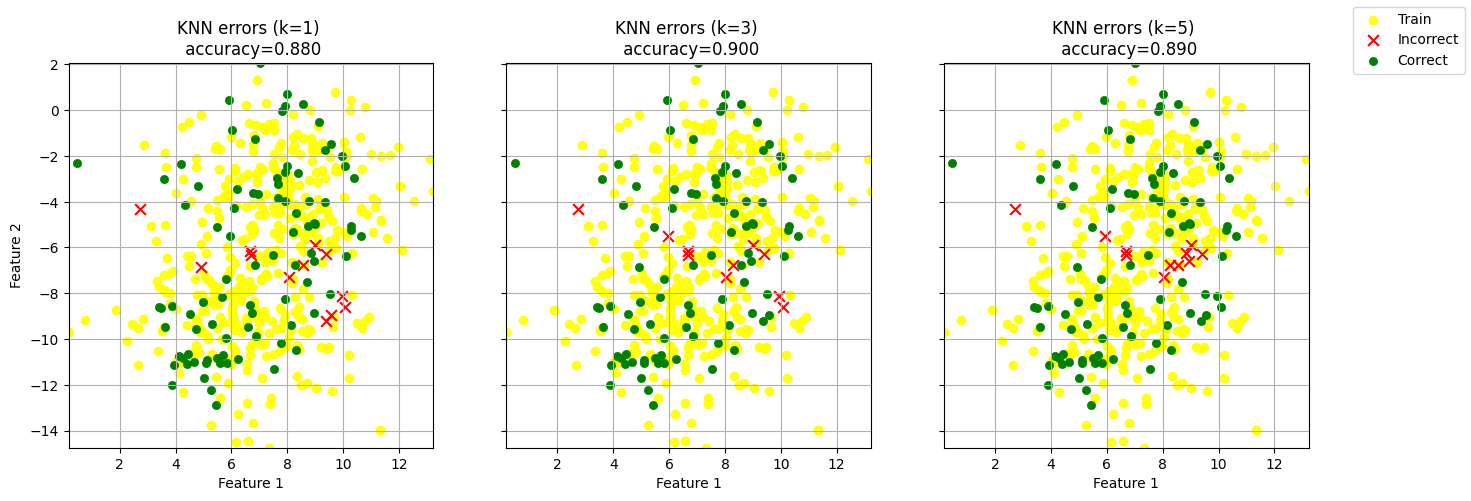

In [393]:
#Now, we will experiment with varying values of k (the main parameter of the model).
#Using the same data as above, train 3 KNN models with k=1,3, and 5.
# For each, display its accuracy, and show a scatter plot of prediction errors.
# Notice which particular points are correct/incorrect for which values of k, and how the accuracy changes.
# TODO: Experiment with different values of k (1,3, and 5) for the data above.
def predict_batch(X_te, X_tr, y_tr, nk):
    predictions = []
    for i in range(len(X_te)):
        pred = predict_y(X_te[i], X_tr, y_tr, nk)
        predictions.append(pred)
    return np.array(predictions)

cmap_correct = ListedColormap(["red","green"])

kvals = [1, 3, 5]
fig, axes = plt.subplots(1, len(kvals), figsize=(16, 5), sharex=True, sharey=True)

x_tot = np.vstack([X_train, X_test])
xlim = (x_tot[:,0].min(), x_tot[:,0].max())
ylim = (x_tot[:,1].min(), x_tot[:,1].max())

for ax, k in zip(axes, kvals):

    pred = predict_batch(X_test, X_train, y_train, k)
    acc = accuracy_score(y_test, pred)
    print(f"k={k}: accuracy = {acc:.3f}")

    ax.scatter(X_train[:,0], X_train[:,1], c = "yellow",
               alpha=0.9, label="Train")

    correctness = (pred == y_test)
    ax.scatter(X_test[~correctness, 0], X_test[~correctness, 1],
           c="red", marker="x", s=60, label="Incorrect")
    ax.scatter(X_test[correctness, 0], X_test[correctness, 1],
           c="green", linewidths=0.5, s=35, label="Correct")

    ax.set_title(f"KNN errors (k={k}) \n accuracy={acc:.3f}")
    ax.set_xlabel("Feature 1")
    ax.set_xlim(xlim); ax.set_ylim(ylim)
    ax.grid(True)

axes[0].set_ylabel("Feature 2")
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")
plt.show()

In [394]:
# Write a few sentences describing how and why the predictions change for different values of k,
# and justifying which choice of k you think seems best for this dataset.
# TODO: Write a few sentences justifying the best choice of k.

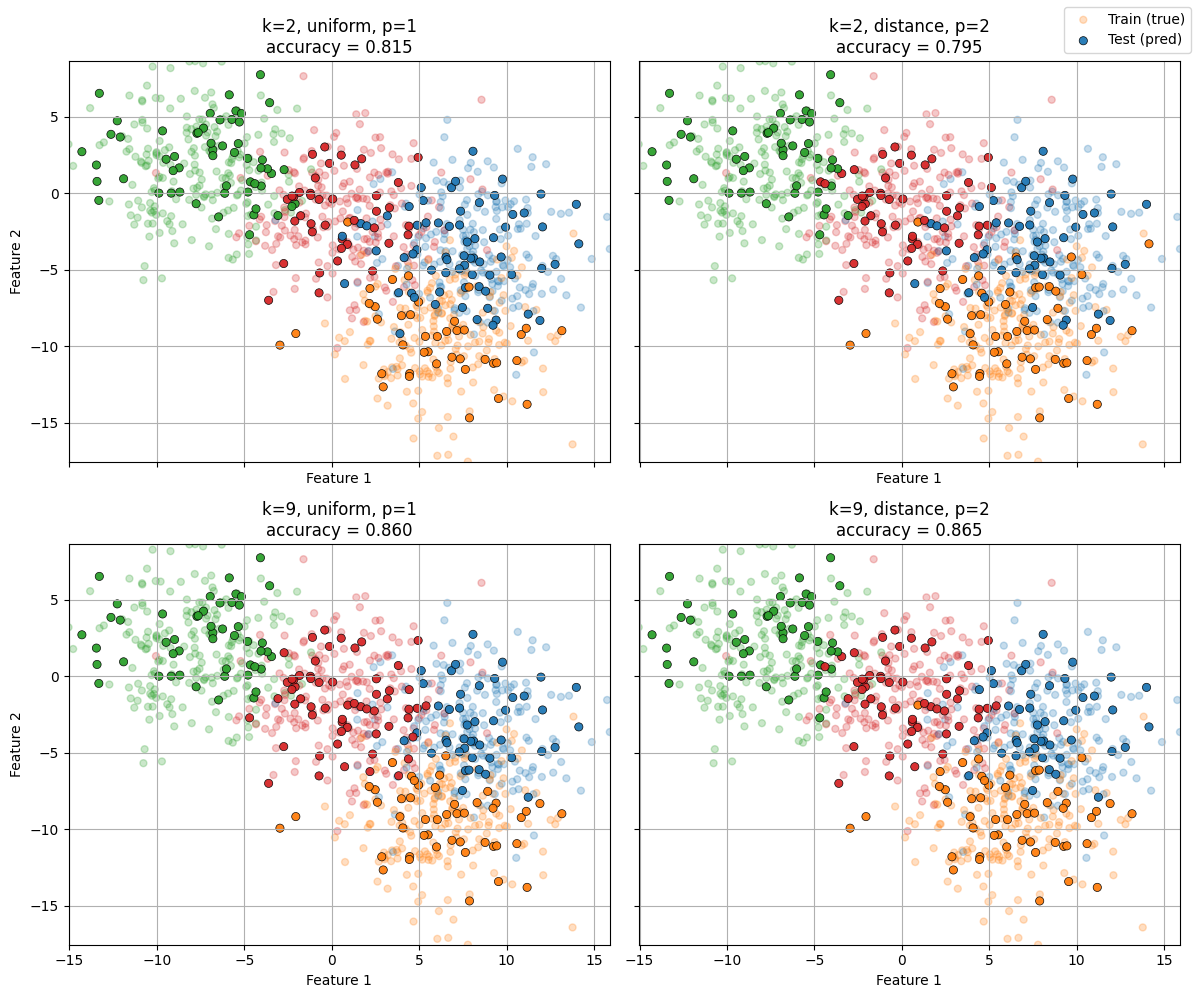

In [395]:
# Now, we will try a more complex example. Following the pattern above, train another KNN classifier (you may use sklearn) on the new provided dataset.
# Try several parameters to try to achieve the best accuracy possible
# (you can try various values of k, but also note that KNeighborsClassifier supports other options, which you may also experiment with).
# TODO: Try to train a good model for the following slightly more complicated dataset
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=6, cluster_std=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52, stratify =y)


# Define and fit the four models
model1 = Pipeline([("scaler", StandardScaler()),
                   ("knn", KNeighborsClassifier(n_neighbors=2, weights="uniform",  p=1))])
model2 = Pipeline([("scaler", StandardScaler()),
                   ("knn", KNeighborsClassifier(n_neighbors=2, weights="distance",  p=2))])
model3 = Pipeline([("scaler", StandardScaler()),
                   ("knn", KNeighborsClassifier(n_neighbors=9, weights="uniform", p=1))])
model4 = Pipeline([("scaler", StandardScaler()),
                   ("knn", KNeighborsClassifier(n_neighbors=9, weights="distance", p=2))])

for mo in (model1, model2, model3, model4):
    mo.fit(X_train, y_train)

# Keep only titles + models
models = [
    ("k=2, uniform, p=1", model1),
    ("k=2, distance, p=2", model2),
    ("k=9, uniform, p=1", model3),
    ("k=9, distance, p=2", model4),
]

cmap_classes = ListedColormap(["tab:blue", "tab:orange", "tab:green", "tab:red"])

x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.ravel()

for ax, (title, pipe) in zip(axes, models):
    yhat = pipe.predict(X_test)
    acc  = accuracy_score(y_test, yhat)

    # Training (true labels, faint)
    ax.scatter(X_train[:,0], X_train[:,1],
               c=y_train, cmap=cmap_classes,
               alpha=0.25, s=25, label="Train (true)")

    # Test (predicted labels, bold)
    ax.scatter(X_test[:,0], X_test[:,1],
               c=yhat, cmap=cmap_classes,
               alpha=0.95, edgecolors="k", linewidths=0.5, s=35,
               label="Test (pred)")

    ax.set_title(f"{title}\naccuracy = {acc:.3f}")
    ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max)
    ax.set_xlabel("Feature 1")
    ax.grid(True)

axes[0].set_ylabel("Feature 2")
axes[2].set_ylabel("Feature 2")
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")
fig.tight_layout()
plt.show()

Write a paragraph, with supporting code and plots, describing a good model for this dataset.

# Part 4: A real dataset

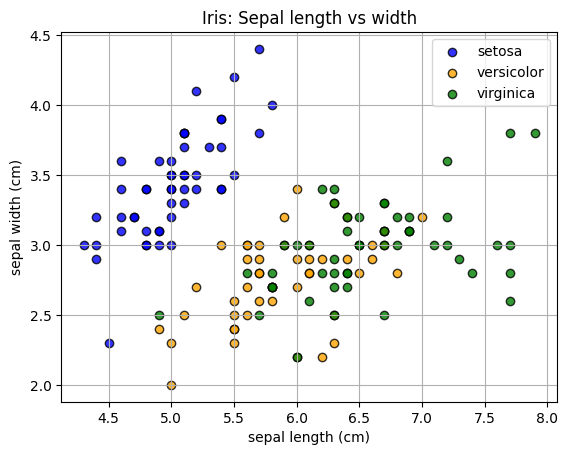

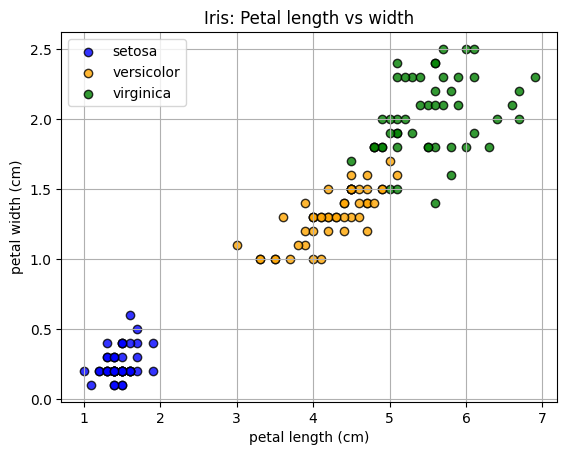

k=5, accuracy=0.967
k=10, accuracy=1.000
k=30, accuracy=0.900
k=70, accuracy=0.900


In [396]:
# TODO: try to train a *good* model for the following real world dataset.
# NOTE, this data is significantly messier than above. For example, the different features have very different ranges of values!
# We will talk more about this in class, but for now, try to find a reasonable classifier, you may also (optionally) normalize the feature values if you'd like to look more into that
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names
colors = ["blue","orange", "green"]

for c, color in zip(np.unique(y), colors):
    plt.scatter(X[y==c, 0], X[y==c, 1], c=color, alpha=0.8,
                label=target_names[c], edgecolors="k")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Iris: Sepal length vs width")
plt.legend()
plt.grid(True)
plt.show()

for c, color in zip(np.unique(y), colors):
    plt.scatter(X[y==c, 2], X[y==c, 3], c = color, alpha=0.8, label=target_names[c], edgecolors="k")
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title("Iris: Petal length vs width")
plt.legend()
plt.grid(True)
plt.show()


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Try different values of k
for k in [5, 10, 30, 70]:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k, weights="distance", p=2))
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    print(f"k={k}, accuracy={ac:.3f}")
